# Exercise 6: Visualization

## Imports

In [5]:
using Pkg
Pkg.add("Graphs")
Pkg.add("GraphPlot")
Pkg.add("Colors")
Pkg.add("CairoMakie")
Pkg.add("LinearAlgebra")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [37e2e46d] + LinearAlgebra v1.11.0
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [6]:
using Graphs
using GraphPlot
using Colors
using CairoMakie
using LinearAlgebra

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/juanaleman/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


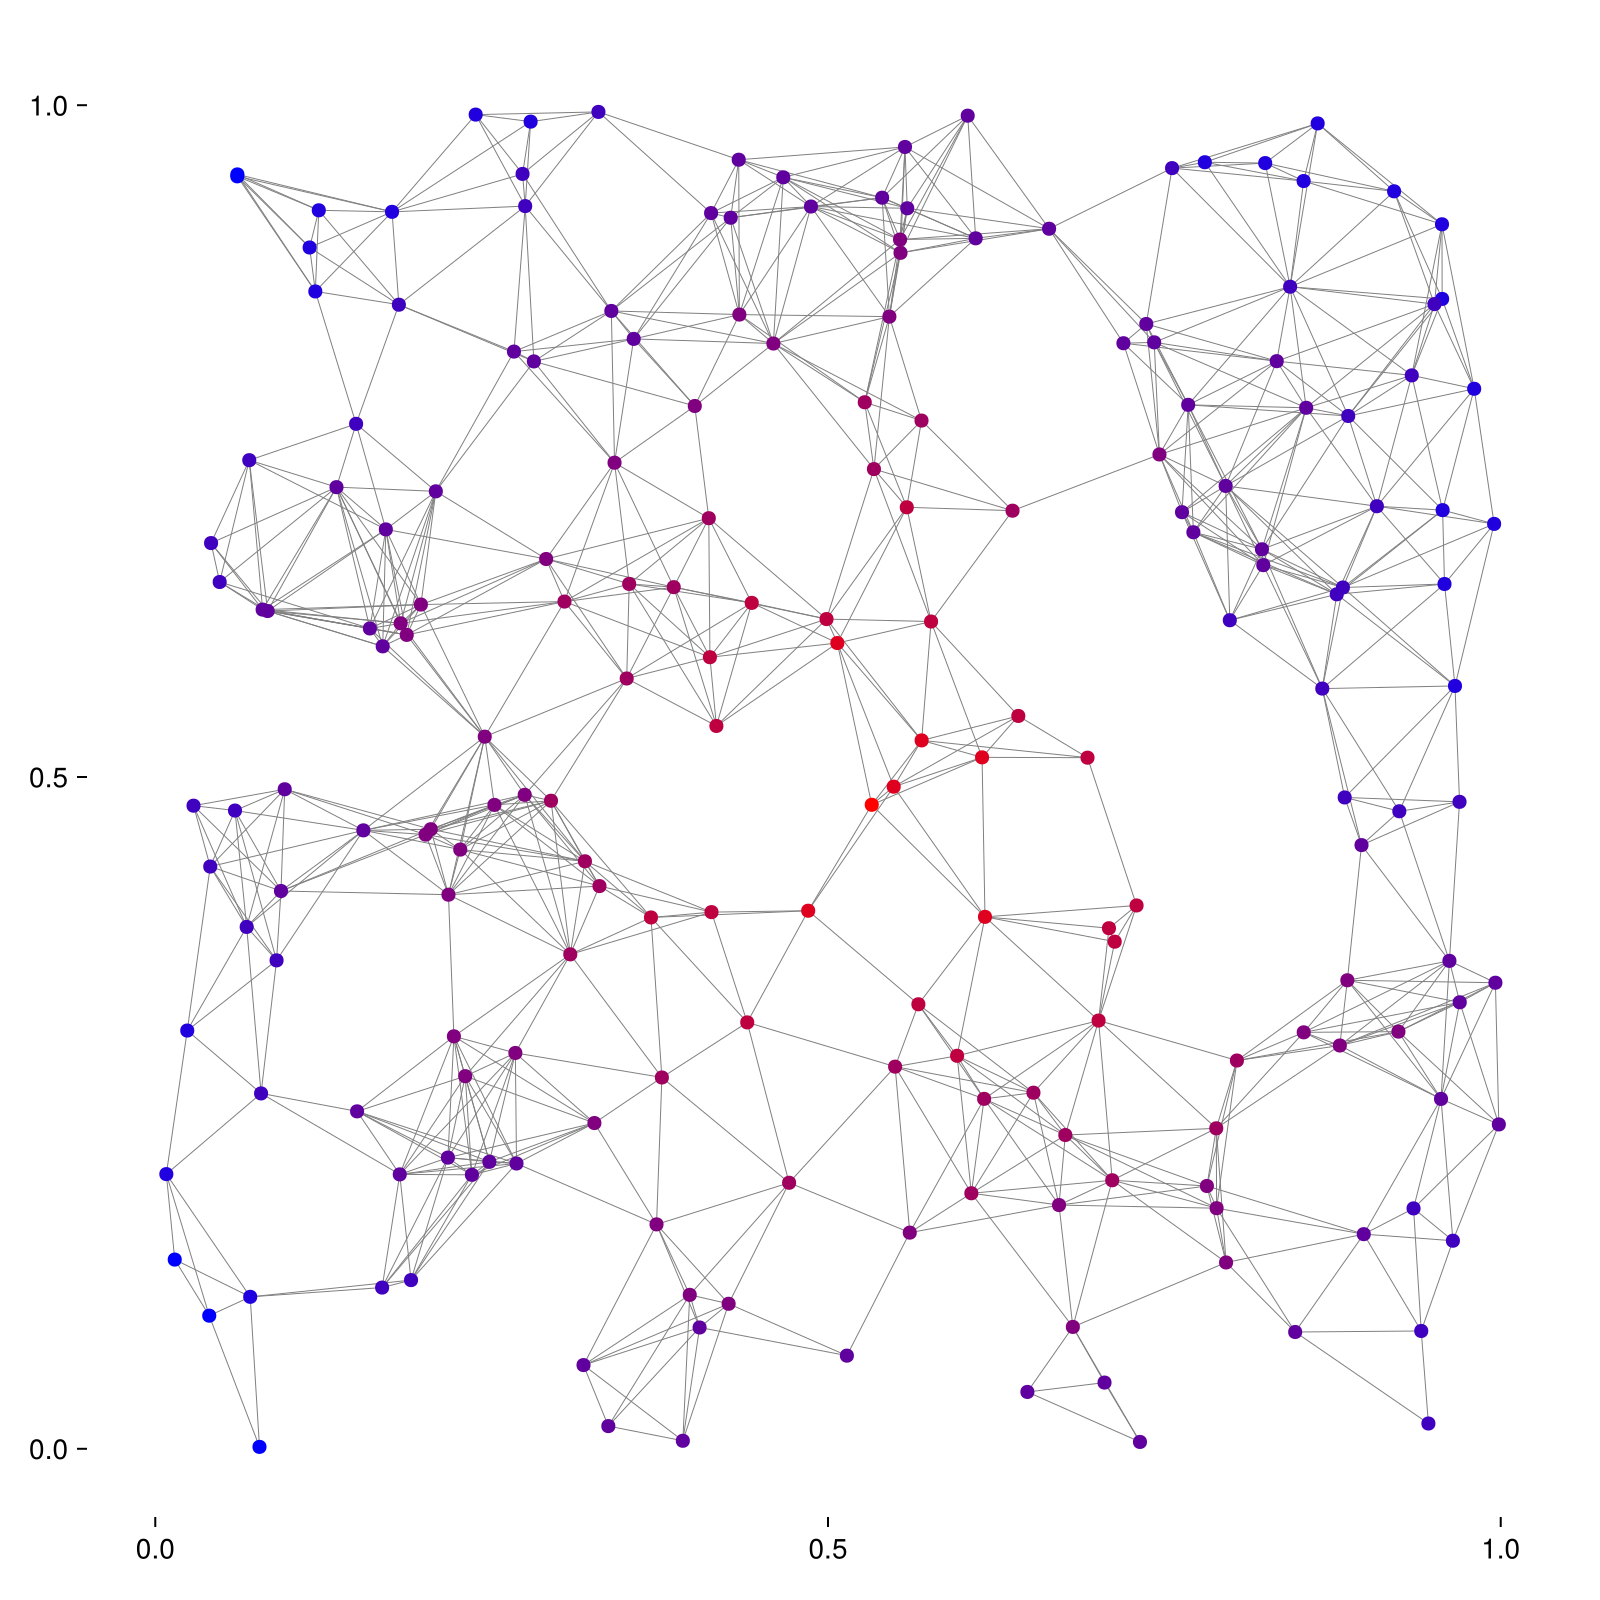

In [10]:
using Graphs
using GraphPlot
using Colors
using CairoMakie
using LinearAlgebra  # Importar para usar `norm`

# Generar un grafo geométrico aleatorio
function random_geometric_graph(n, radius)
    positions = [(rand(), rand()) for _ in 1:n]
    g = SimpleGraph(n)
    for i in 1:n
        for j in i+1:n
            if norm(positions[i] .- positions[j]) ≤ radius
                add_edge!(g, i, j)
            end
        end
    end
    return g, positions
end

# Configuración del grafo
n = 200
radius = 0.125
graph, positions = random_geometric_graph(n, radius)

# Encontrar el nodo más cercano al centro
center = (0.5, 0.5)
distances_to_center = [norm(pos .- center) for pos in positions]
central_node = argmin(distances_to_center)

# Calcular las distancias más cortas desde el nodo central
shortest_paths = dijkstra_shortest_paths(graph, central_node)
distances = shortest_paths.dists

# Normalizar distancias para el color
max_distance = maximum(distances)
colors = [RGB(1.0 - dist / max_distance, 0.0, dist / max_distance) for dist in distances]

# Dibujar el grafo
f = Figure(resolution = (800, 800))
ax = Axis(f[1, 1], aspect = 1, xgridvisible = false, ygridvisible = false)  # Desactivar cuadrículas

# Dibujar las conexiones
for edge in edges(graph)
    i, j = Tuple(edge)
    pos_i = positions[i]
    pos_j = positions[j]
    lines!(ax, [pos_i[1], pos_j[1]], [pos_i[2], pos_j[2]], color = :gray, linewidth = 0.5)
end

# Dibujar los nodos
for (i, pos) in enumerate(positions)
    scatter!(ax, [pos[1]], [pos[2]], color = colors[i], markersize = 10)
end

# Configurar límites de los ejes
xlims!(ax, -0.05, 1.05)
ylims!(ax, -0.05, 1.05)

# Ocultar los bordes (spines)
hidespines!(ax)

f